## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults (1).csv', names=["Date", "Tag", "Posts"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()


,Date,Tag,Posts
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,c,83.0
4,2008-08-01 00:00:00,c#,505.0


In [ ]:
df.tail()

,Date,Tag,Posts
2436,2023-03-01 00:00:00,php,2577.0
2437,2023-03-01 00:00:00,python,16714.0
2438,2023-03-01 00:00:00,r,3915.0
2439,2023-03-01 00:00:00,ruby,313.0
2440,2023-03-01 00:00:00,swift,1460.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2441, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

Date     2441
Tag      2441
Posts    2440
dtype: int64

In [ ]:
clean_df = df.dropna()

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
clean_df.groupby("Tag").sum()

<ipython-input-69-f2a27995e767>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df.groupby("Tag").sum()


,Posts
Tag,
assembly,42456.0
c,394541.0
c#,1585931.0
c++,790906.0
delphi,50716.0
go,68364.0
java,1891099.0
javascript,2483559.0
perl,67604.0


In [ ]:
clean_df.groupby("Tag").sum().sort_values("Posts", ascending=False)

<ipython-input-70-9895439901f9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df.groupby("Tag").sum().sort_values("Posts", ascending=False)


,Posts
Tag,
javascript,2483559.0
python,2118707.0
java,1891099.0
c#,1585931.0
php,1456125.0
c++,790906.0
r,485547.0
c,394541.0
swift,325734.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
clean_df.groupby("Tag").count()

,Date,Posts
Tag,,
assembly,176,176
c,176,176
c#,177,177
c++,176,176
delphi,176,176
go,161,161
java,176,176
javascript,176,176
perl,176,176


In [ ]:
clean_df.groupby("Tag").count().idxmin()

Date     go
Posts    go
dtype: object

Go had the fewest number of months with an entry.

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
clean_df.Date = pd.to_datetime(clean_df.Date)

<ipython-input-83-59e94d30c2d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.Date = pd.to_datetime(clean_df.Date)


In [ ]:
clean_df.head()

,Date,Tag,Posts
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,c,83.0
4,2008-08-01,c#,505.0
5,2008-08-01,c++,164.0


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df = clean_df.pivot_table(index="Date", columns="Tag", values="Posts", fill_value=0)


In [ ]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2008-08-01,8,83,505,164,14,0,222,163,28,158,120,0,70,0
2008-09-01,28,319,1642,754,104,0,1129,634,130,476,536,6,287,0
2008-10-01,16,302,1987,807,112,0,1149,722,128,610,506,0,247,0
2008-11-01,16,258,1730,734,141,0,956,580,97,500,450,1,158,0


In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [ ]:
reshaped_df.shape

(177, 14)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

Tag
assembly      177
c             177
c#            177
c++           177
delphi        177
go            177
java          177
javascript    177
perl          177
php           177
python        177
r             177
ruby          177
swift         177
dtype: int64

In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
x = reshaped_df.index
y = reshaped_df.python
y2 = reshaped_df.java
y3 = reshaped_df.javascript

Text(0, 0.5, 'Posts')

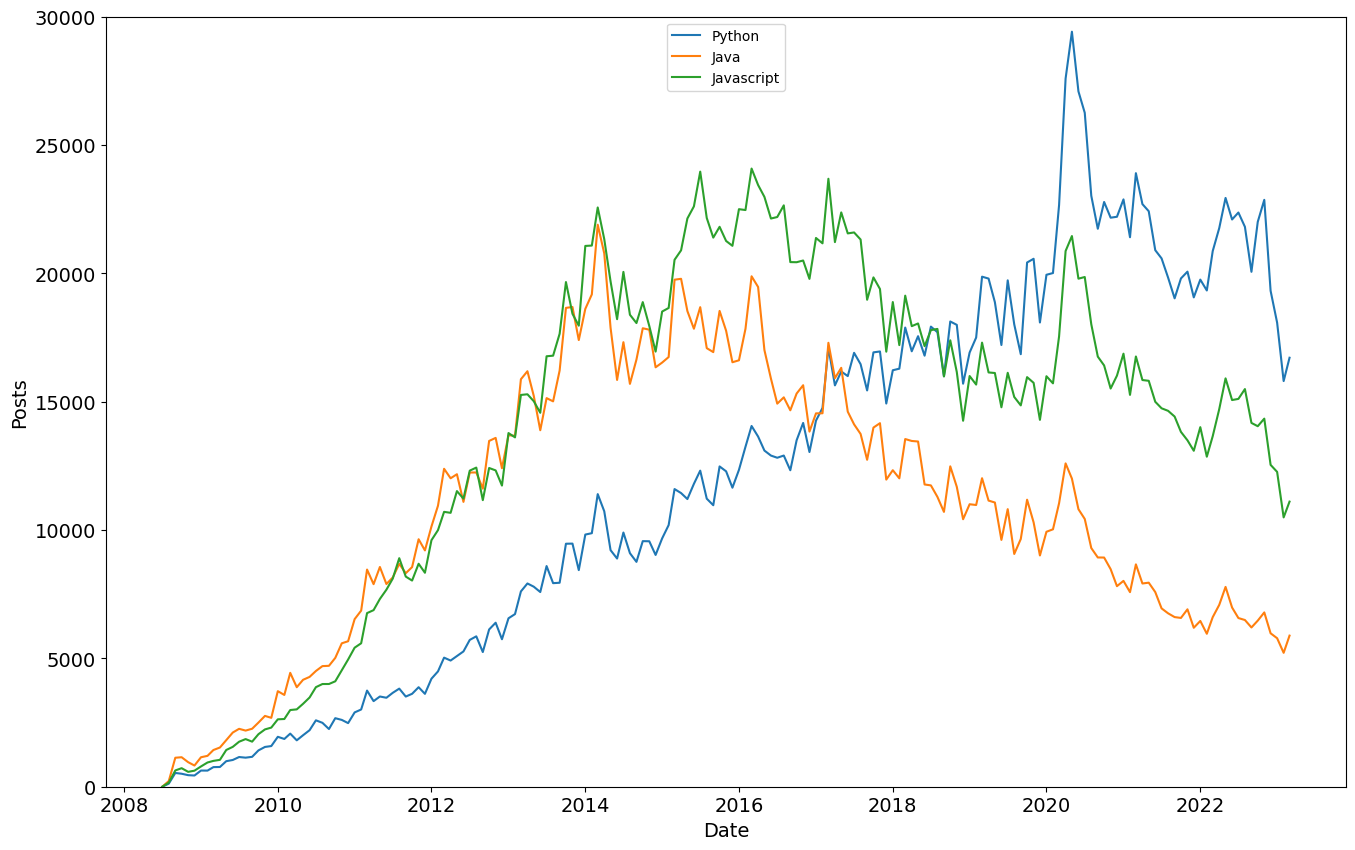

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x,y, label="Python")
plt.plot(x,y2, label="Java")
plt.plot(x,y3, label="Javascript")
plt.legend(loc="upper center")
plt.ylim(0,30000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize=14)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

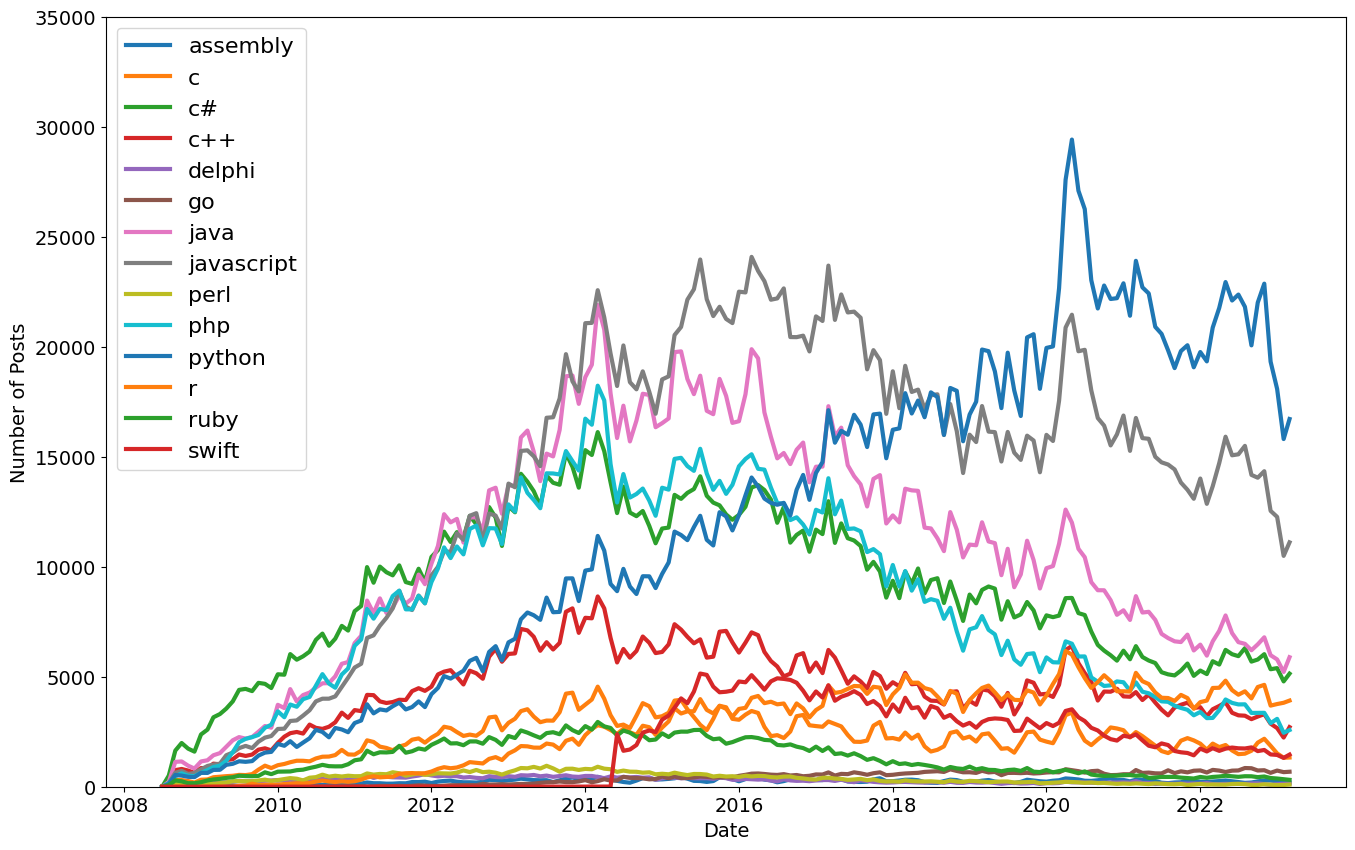

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

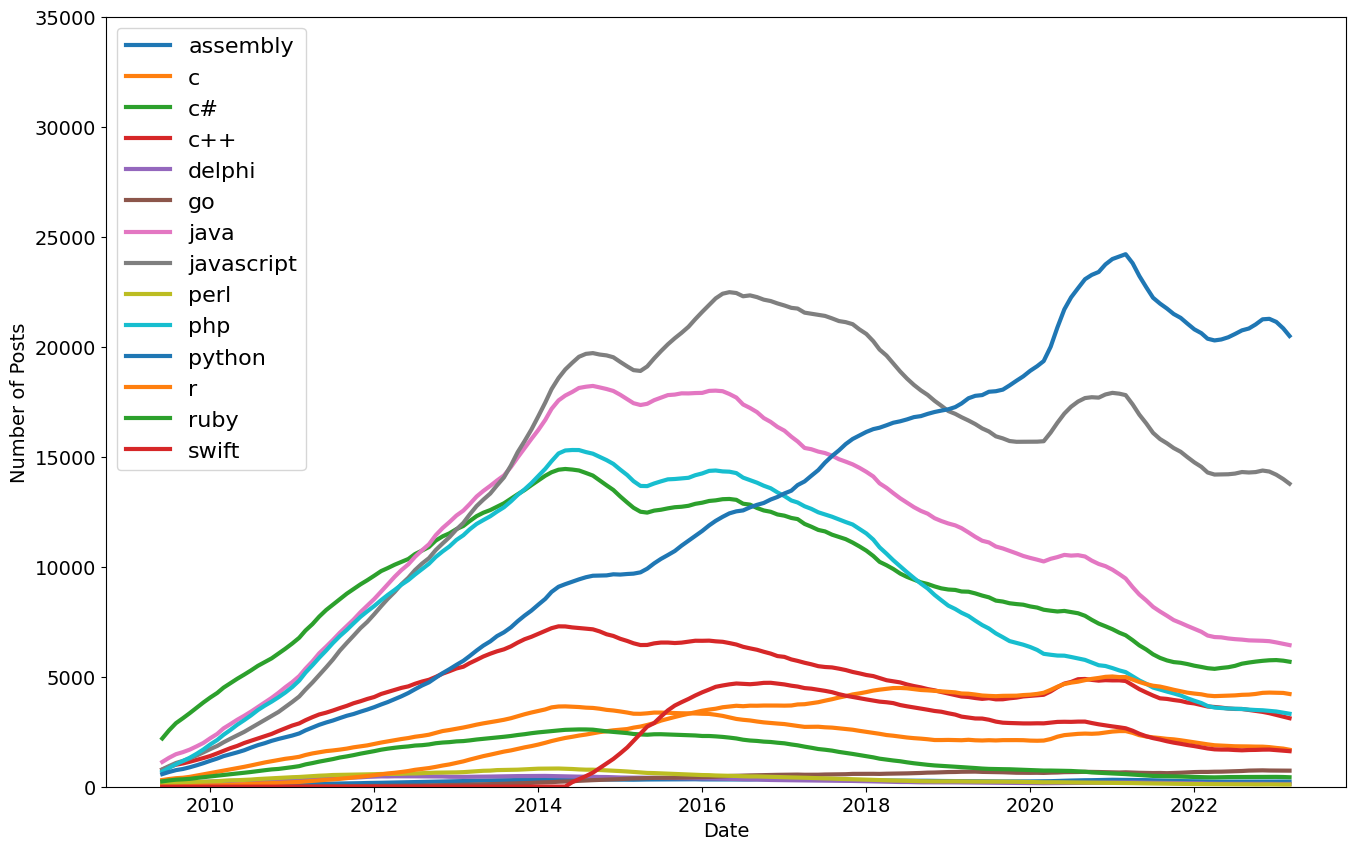

In [ ]:
# The window is number of observations that are averaged (window = 3, 6, 12, etc)
roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)
